In [1]:
# !pip install --upgrade pip
# !pip install pymoo

In [2]:
import pymoo

In [3]:
pymoo.__version__

'0.6.0.1'

In [4]:
import numpy as np
import pandas as pd
import pickle

## Let's start with a simple and standard optimisation problem
---------

<div>
<center>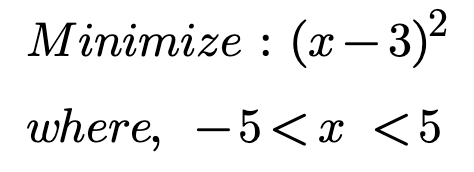</center>
</div>

### Problem Definition
-------

In [5]:
from pymoo.core.problem import (
                        Problem,           # Vectorized - since most MO algorithms work with populations, this class evaluates a set of solutons at once 
                        ElementwiseProblem # Inherits from the Problem Class, works with a single solution at a time
                               )
from pymoo.problems.functional import FunctionalProblem  # Inherits from the ElementwiseProblem class , works with functions for each objective and constraint



In [6]:
# Vectorised Problem
class DeterministicProblem_P(Problem):

    def __init__(self):
        super().__init__(n_var = 1,
                         n_obj = 1,
                         xl = -5,
                         xu = 5)

    def _evaluate(self, x, out, *args, **kwargs):
        print(f"Vectorised Problem Class Length: {len(x)}", end = "\r")
        out["F"] = (x - 3)**2 # F -> objective function
        
problem_p = DeterministicProblem_P()

# ElementwiseProblem
class DeterministicProblem_EWP(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var = 1,
                         n_obj = 1,
                         xl = -5,
                         xu = 5)

    def _evaluate(self, x, out, *args, **kwargs):
        print(f"Elementwise Problem Class Length: {len(x)}", end = "\r")
        out["F"] = (x - 3)**2
        
problem_ewp = DeterministicProblem_EWP()
        
# Functional Problem
objective_function = lambda x : (x-3)**2
problem_fp = FunctionalProblem(n_var = 1,
                            objs = objective_function,
                            xl = -5,
                            xu = 5 )


problems_list = [problem_p , problem_ewp , problem_fp]

### Algorithms
--------

In [7]:
from pymoo.algorithms.soo.nonconvex.de import DE # Differential Evolution
from pymoo.algorithms.soo.nonconvex.ga import GA # Genetic Algorithm
from pymoo.algorithms.soo.nonconvex.nelder import NelderMead
from pymoo.optimize import minimize

In [8]:
de_algo  = DE(pop_size = 50)
ga_algo  = GA(pop_size = 50) # has functionality to add mutation, crossover, sampling, selection, survival 
nm_algo  = NelderMead(init_simplex_scale=0.1)

algorithms_list = [de_algo , ga_algo , nm_algo]

In [9]:
import time
for prob in problems_list:
    for algo in algorithms_list:
        print(f"******** {type(prob).__name__} with {type(algo).__name__} Algorithm ********")
        res = minimize(problem = prob,
                   algorithm = algo,
                   seed=1,
                   verbose=False)
        
        print("\n")
        print("Solution: \nX = %s\nF = %s" % (res.X, res.F))

******** DeterministicProblem_P with DE Algorithm ********
Vectorised Problem Class Length: 50

Solution: 
X = [3.]
F = [2.52270026e-25]
******** DeterministicProblem_P with GA Algorithm ********
Vectorised Problem Class Length: 50

Solution: 
X = [3.00000901]
F = [8.1156701e-11]
******** DeterministicProblem_P with NelderMead Algorithm ********
Vectorised Problem Class Length: 10

Solution: 
X = [3.00015844]
F = [2.51043889e-08]
******** DeterministicProblem_EWP with DE Algorithm ********
Elementwise Problem Class Length: 1

Solution: 
X = [3.]
F = [2.52270026e-25]
******** DeterministicProblem_EWP with GA Algorithm ********
Elementwise Problem Class Length: 1

Solution: 
X = [3.00000901]
F = [8.1156701e-11]
******** DeterministicProblem_EWP with NelderMead Algorithm ********
Elementwise Problem Class Length: 1

Solution: 
X = [3.00015844]
F = [2.51043889e-08]
******** FunctionalProblem with DE Algorithm ********


Solution: 
X = [3.]
F = [2.52270026e-25]
******** FunctionalProblem wi

In [10]:
# Just like that, we have a more flexible way of finding optimal solutions to problems using multiple algorithms

## Let's get the ball rolling 
-----------

### Adding Complexity 

- Multi Objective
    - Minimise and Maximise together
- Constraints
    - Inequality

## The BNH (Binh and Korn) Problem
<div>
<center>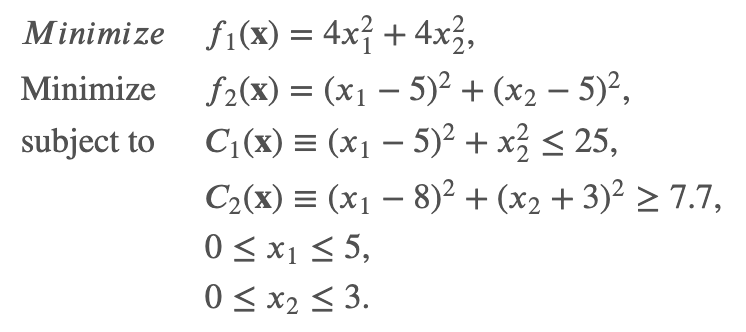</center>
</div>

In [11]:
class BNH(Problem):

    def __init__(self):
        super().__init__(n_var = 2,
                         n_obj = 2,
                         n_ieq_constr = 2, 
                         xl = np.array([0 , 0]),
                         xu = np.array([5 , 3]))

    def _evaluate(self, x, out, *args, **kwargs):
        
        # Objective functions
        obj1 = 4*(x[:,0]**2) + 4*(x[:,1]**2) # Objective Function 1 to be minimised
        obj2 = (x[:,0] - 5)**2 + (x[:,1] - 5)**2 # Objective Function 2 to be minimised
        
        # Constraints, default orientation of constraints being met is < 0
        const1 = (x[:,0] - 5)**2 + x[:,1]**2 - 25    # -25 to arrange for the above alignment
        const2 = 7.7 -(x[:,0] - 8)**2 -(x[:,1] + 3)**2 # Rearrangement

        # Stacking Objectives to "F" and Constraints to "G"
        out["F"] = np.column_stack([obj1 , obj2])
        out["G"] = np.column_stack([const1 , const2])


In [12]:
bnh_problem = BNH()

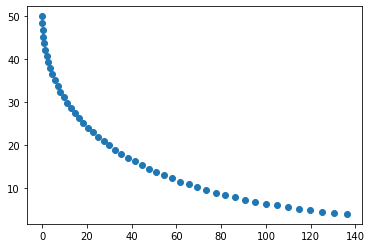

In [13]:
# Let's visualise the problem
from pymoo.util.plotting import plot

n_points = 50

x1 = np.linspace(0, 5, n_points)
x2 = np.linspace(0, 3, n_points)

X = np.column_stack([x1, x2])
plot(bnh_problem.evaluate(X, return_values_of=["F"]))

### Let's solve it with constraints

In [14]:
from pymoo.algorithms.moo.nsga2 import NSGA2
algorithm = NSGA2(pop_size = 200)

In [15]:
res = minimize(problem = bnh_problem,
               algorithm = algorithm,
               seed=1,
               verbose=False)

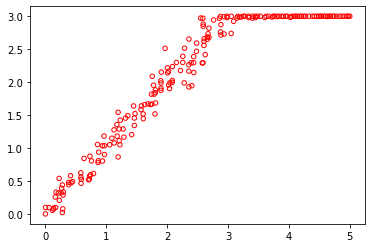

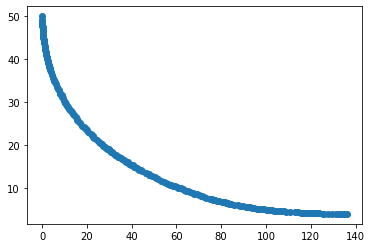

In [16]:
plot(res.X, no_fill = True);
plot(res.F, );


## Up a notch : Complexity +++

- Statistical Problem
- Modelled with Non Linear Regression
- Multiple Variable Types
- Maximise and Minimise
- Equality Constraints

In [17]:
df = pd.read_csv("Steel Manufacturing.csv")

In [18]:
df.head()

,Heating Temperature,Cooling Temperature,Solid Mold Size,Coke %,Minerals %,Production Type,Inclusions,Steel Strength
0,147,127,51,39,61,Unit 2,13.83,962
1,180,123,49,64,36,Unit 1,9.34,928
2,155,141,66,71,29,Unit 2,12.84,1142
3,177,136,38,40,60,Unit 1,15.08,691
4,147,123,57,48,52,Unit 1,9.57,973


In [19]:
# Loading Existing Models

inclusion_model_path = "inclusions_model.pkl"
steel_strength_model_path = "steel_strength_model.pkl"

with open(inclusion_model_path, 'rb') as f:
    inclusion_model = pickle.load(f)
    
with open(steel_strength_model_path, 'rb') as f:
    steel_strength_model = pickle.load(f)

In [20]:
X = df.drop(columns = ["Inclusions", "Steel Strength"])

In [21]:
inclusion_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Heating Temperature', 'Cooling Temperature', 'Solid Mold Size',
       'Coke %', 'Minerals %'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Production Type'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [22]:
inclusion_model.predict(X)

array([13.5831,  9.2154, 12.46  , ..., 10.671 , 14.7463, 15.4303])

In [23]:
steel_strength_model.predict(X)

array([ 974.34,  920.4 , 1120.67, ..., 1007.94,  509.4 ,  510.23])

## Building the Optimiser

In [24]:
from pymoo.core.variable import Choice, Real, Integer 

In [25]:
X.columns

Index(['Heating Temperature', 'Cooling Temperature', 'Solid Mold Size',
       'Coke %', 'Minerals %', 'Production Type'],
      dtype='object')

In [26]:
mixed_variables = {
    "Heating Temperature" : Integer(bounds=(df['Heating Temperature'].min(),
                                        df['Heating Temperature'].max())),

    "Cooling Temperature" : Integer(bounds=(df['Cooling Temperature'].min(),
                                            df['Cooling Temperature'].max())), 
    
    "Solid Mold Size" : Real(bounds=(df['Solid Mold Size'].min(),
                                        df['Solid Mold Size'].max())),
    
    "Coke %" : Real(bounds=(df['Coke %'].min(),
                                        df['Coke %'].max())),
    
    "Minerals %" : Real(bounds=(df['Minerals %'].min(),
                                    df['Minerals %'].max())),
    
    "Production Type" : Choice(options = list(df['Production Type'].unique())),
    
}

In [27]:
mixed_variables

{'Heating Temperature': <pymoo.core.variable.Integer at 0x7f8eb488f190>,
 'Cooling Temperature': <pymoo.core.variable.Integer at 0x7f8eb488f2e0>,
 'Solid Mold Size': <pymoo.core.variable.Real at 0x7f8eb4871c70>,
 'Coke %': <pymoo.core.variable.Real at 0x7f8eb3a4feb0>,
 'Minerals %': <pymoo.core.variable.Real at 0x7f8eb3cb59d0>,
 'Production Type': <pymoo.core.variable.Choice at 0x7f8eb4871760>}

## Constraints of the System

- The sum of coke and mineral percentages should equal 100
- Cooling Temperature must be less than Heating Temperature

## Single Objective : Maximise Steel Strength
--------

In [55]:
class SteelManufacturing(Problem):

    def __init__(self, **kwargs):
        super().__init__(vars = mixed_variables, n_obj = 1,
                         n_ieq_constr = 1 , n_eq_constr = 1 ,
                         **kwargs) 

    def _evaluate(self, x, out, *args, **kwargs):
        
        # Type conversion for Prediction and Constraint
        temp_df = pd.DataFrame(list(x))
        
        obj1 = -1*steel_strength_model.predict(temp_df) # Maximise
        
        equality_constraint = temp_df[["Coke %", "Minerals %"]].sum(axis = 1) - 100
        inequality_constraint = temp_df["Cooling Temperature"] - temp_df["Heating Temperature"]
        
        out["F"] = np.column_stack([obj1 ])
        out["G"] = np.column_stack([inequality_constraint])
        out["H"] = np.column_stack([equality_constraint])

In [57]:
from pymoo.core.mixed import MixedVariableMating, MixedVariableSampling, MixedVariableDuplicateElimination

problem = SteelManufacturing()

algorithm = NSGA2(pop_size = 100,
                  sampling = MixedVariableSampling(),
                  mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
                  eliminate_duplicates = False)

res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose = False,
              seed = 42)

In [69]:
result = pd.DataFrame(list(res.X))
result['Steel Strength'] = -1*res.F
result['Inclusions'] = inclusion_model.predict(result)

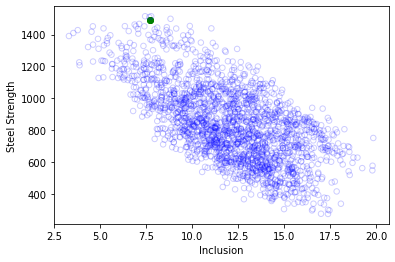

In [77]:
import matplotlib.pyplot as plt
plt.scatter(result['Inclusions'] , result['Steel Strength'], s = 30, color = "green");
plt.scatter(df['Inclusions'] , df['Steel Strength'], s = 30, alpha = 0.2, facecolors='none', edgecolors='blue');
plt.xlabel("Inclusion")
plt.ylabel("Steel Strength");

## Multi Objective Optimisation : Minimise Inclusions and Maximise Steel Strength
---------

In [79]:
class SteelManufacturing(Problem):

    def __init__(self, **kwargs):
        super().__init__(vars = mixed_variables, n_obj = 2,
                         n_ieq_constr = 1 , n_eq_constr = 1 ,
                         **kwargs) 

    def _evaluate(self, x, out, *args, **kwargs):
        
        # Type conversion for Prediction and Constraint
        temp_df = pd.DataFrame(list(x))
        
        obj1 = inclusion_model.predict(temp_df) # Minimise
        obj2 = -1*steel_strength_model.predict(temp_df) # Maximise
        
        equality_constraint = temp_df[["Coke %", "Minerals %"]].sum(axis = 1) - 100
        inequality_constraint = temp_df["Cooling Temperature"] - temp_df["Heating Temperature"]
        
        out["F"] = np.column_stack([obj1 , obj2])
        out["G"] = np.column_stack([inequality_constraint])
        out["H"] = np.column_stack([equality_constraint])

In [88]:
from pymoo.core.mixed import MixedVariableMating, MixedVariableSampling, MixedVariableDuplicateElimination

problem = SteelManufacturing()

algorithm = NSGA2(pop_size = 500,
                  sampling = MixedVariableSampling(),
                  mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
                  eliminate_duplicates = False)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               verbose = False,
              seed = 42)

In [89]:
result = pd.DataFrame(list(res.X))

In [90]:
pd.set_option("display.max_rows", 100)
result['Inclusions'] = inclusion_model.predict(result)
result['Steel Strength'] = steel_strength_model.predict(result)

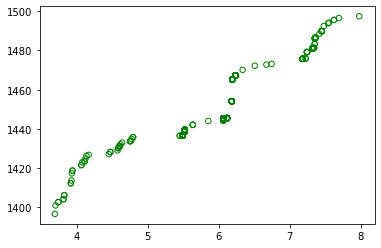

In [91]:
import matplotlib.pyplot as plt
plt.scatter(result['Inclusions'] , result['Steel Strength'], s = 30, facecolors='none', edgecolors='green');

## Putting this in context

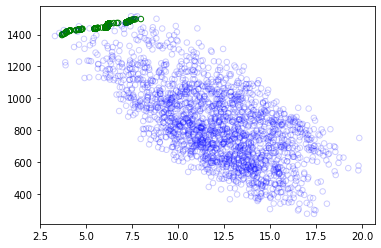

In [92]:
plt.scatter(result['Inclusions'] , result['Steel Strength'], s = 30, facecolors='none', edgecolors='green');
plt.scatter(df['Inclusions'] , df['Steel Strength'], s = 30, alpha = 0.2,facecolors='none', edgecolors='blue');

In [93]:
result.head(10)

,Heating Temperature,Cooling Temperature,Solid Mold Size,Coke %,Minerals %,Production Type,Inclusions,Steel Strength
0,173,115,50.866217,70.968045,29.031928,Unit 1,3.6945,1396.70
1,173,132,60.123600,70.968077,29.031928,Unit 2,7.9814,1497.45
2,180,119,54.252112,70.968045,29.031928,Unit 2,6.1847,1454.13
3,176,131,54.405615,70.968072,29.031928,Unit 1,5.4536,1436.54
4,176,128,50.698601,70.968045,29.031928,Unit 1,4.7966,1435.81
5,173,122,59.433762,70.968045,29.031928,Unit 2,6.7464,1473.18
6,181,120,54.478955,70.968045,29.031928,Unit 2,6.1924,1465.23
7,180,125,54.298916,70.968045,29.031928,Unit 2,7.1833,1475.76
8,177,116,59.283591,70.968045,29.031928,Unit 2,5.8554,1444.05
9,180,116,59.497267,70.968045,29.031928,Unit 2,5.6367,1442.11
